# 表データの取り扱い

## pandasのメリット
* Excel形式のデータを読み込める
* Excel形式に書き出せる
* 表データの中身が見やすい
* plotも手軽
* 数値データ以外も取り扱える
* データの検索・抽出・削除などデータの加工に有用


純粋な工学計算だけに使うのであれば、なくても問題ない。  
データの可視化が容易、Excelファイルの読み書きなど
工学計算のみの使用でも有用な機能を紹介する

## 準備
1. matplotlibのバックエンドはinline
2. pandasはpdという別名でインポートされうことが多い
3. numpyのインポート
4. 下記のx,y
```python
x = np.linspace(0,1.,101)
y = np.sin(2.*np.pi*x)
```

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
x = np.linspace(0,1.,101)
y = np.sin(2.*np.pi*x)

## DataFrame
データを格納する表。
第一引数に配列(x,yを列方向に結合)を渡す。
各列名をcolumusの引数にリストとして渡す。

```python
df1 = pd.DataFrame(np.c_[x,y], columns=["time","data"])
```

このDataFrameインスタンスはplotメソッドを持ち、容易にプロット可能
```python
df1.plot(x="time")
```

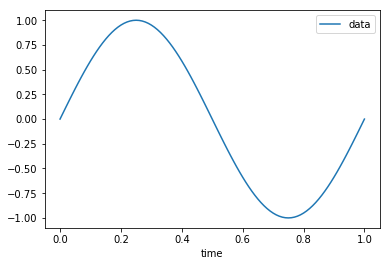

In [2]:
df1 = pd.DataFrame(np.c_[x,y], columns=["time","data"])
df1.plot(x="time")

plotメソッドの引数にグラフの体裁を整えるオプションが使用できる
```python
df1.plot(x="time",grid=True,xlim=(0,1.),title="sin",figsize=(6,6))
```

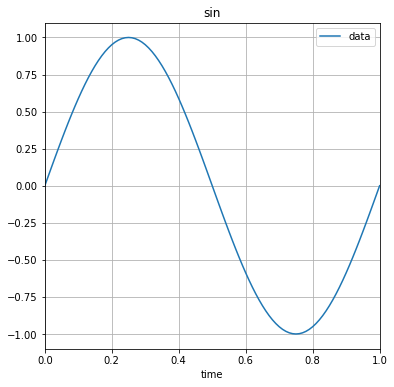

In [3]:
df1.plot(x="time",grid=True,xlim=(0,1.),title="sin",figsize=(6,6))

表の中身はインスタンスを指定するとJupyterNotebookがいい感じのHTMLで表示してくれる

In [4]:
df1

,time,data
0,0.00,0.000000e+00
1,0.01,6.279052e-02
2,0.02,1.253332e-01
3,0.03,1.873813e-01
4,0.04,2.486899e-01
5,0.05,3.090170e-01
6,0.06,3.681246e-01
7,0.07,4.257793e-01
8,0.08,4.817537e-01
9,0.09,5.358268e-01


ただし長い。。。転置して表示するのがおおすすめ

In [5]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
time,0.0,0.010000,0.020000,0.030000,0.04000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.910000,0.920000,0.930000,0.940000,0.950000,0.96000,0.970000,0.980000,0.990000,1.000000e+00
data,0.0,0.062791,0.125333,0.187381,0.24869,0.309017,0.368125,0.425779,0.481754,0.535827,...,-0.535827,-0.481754,-0.425779,-0.368125,-0.309017,-0.24869,-0.187381,-0.125333,-0.062791,-2.449294e-16


データすべて見なくても概要だけでよい場合、インスタンスメソッドdescribeを使う

In [6]:
df1.describe()

,time,data
count,101.000000,1.010000e+02
mean,0.500000,7.355928e-17
std,0.293002,7.071068e-01
min,0.000000,-1.000000e+00
25%,0.250000,-6.845471e-01
50%,0.500000,0.000000e+00
75%,0.750000,6.845471e-01
max,1.000000,1.000000e+00


## Excelファイル形式の取り扱い
初めにDataFrameの複製を行う。
```python
df2 = df1.copy()
df2.data = df2.data +1
```

In [7]:
df2 = df1.copy()
df2.data = df2.data +1

Pythonを用いてデータ処理した結果をExcel形式のファイルとして保存する。  
ExcelWriterインスタンスにデータを与え、書き込んでいる
```python
writer = pd.ExcelWriter('pandas.xlsx')
df1.to_excel(writer,sheet_name='170317')
df2.to_excel(writer,sheet_name='170318')
writer.save()
```


In [8]:
writer = pd.ExcelWriter('pandas.xlsx')
df1.to_excel(writer,sheet_name='170317')
df2.to_excel(writer,sheet_name='170318')
writer.save()

逆に、excelファイルから読み込む場合はread_excelメソッドを使う
```python
df3 = pd.read_excel("./pandas.xlsx",sheet_name="170318")
```

In [9]:
df3 = pd.read_excel("./pandas.xlsx",sheet_name="170318")

In [10]:
df3.T

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
time,0.0,0.010000,0.020000,0.030000,0.04000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.910000,0.920000,0.930000,0.940000,0.950000,0.96000,0.970000,0.980000,0.990000,1.0
data,1.0,1.062791,1.125333,1.187381,1.24869,1.309017,1.368125,1.425779,1.481754,1.535827,...,0.464173,0.518246,0.574221,0.631875,0.690983,0.75131,0.812619,0.874667,0.937209,1.0


## CSVファイル形式の取り扱い
csvファイルの読み込みはDataFrameインスタンスのto_csvメソッドを使い、  
読み込みpd.read_csv関数を使う 
```python
df2.to_csv("pandas.csv")
df4 = pd.read_csv("pandas.csv",index_col=0)
df4.T
```

In [11]:
df2.to_csv("pandas.csv")
df4 = pd.read_csv("pandas.csv",index_col=0)
df4.T

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
time,0.0,0.010000,0.020000,0.030000,0.04000,0.050000,0.060000,0.070000,0.080000,0.090000,...,0.910000,0.920000,0.930000,0.940000,0.950000,0.96000,0.970000,0.980000,0.990000,1.0
data,1.0,1.062791,1.125333,1.187381,1.24869,1.309017,1.368125,1.425779,1.481754,1.535827,...,0.464173,0.518246,0.574221,0.631875,0.690983,0.75131,0.812619,0.874667,0.937209,1.0


---
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img align="right" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><br />
<div align="right"><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">python4engineer</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/TatsuyaKatayama/python4engineer" property="cc:attributionName" rel="cc:attributionURL">TatsuyaKatayama</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>. </div>

